In [266]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix, f1_score, classification_report


In [267]:
df=pd.read_csv('musk_csv.csv')
df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0


In [268]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


Data Analysis

In [269]:
# Number of rows and column in Dataframe
rows,columns=df.shape
print("Number of rows:",rows)
print("Number of columns:",columns)

Number of rows: 6598
Number of columns: 170


In [270]:
# Dtatypes in Dataframe
df.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 170, dtype: object

In [271]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

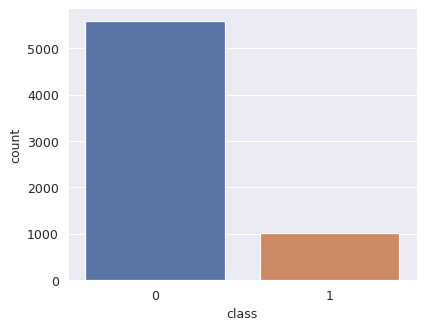

In [272]:
sns.set({'figure.figsize': (5,4)},  font_scale=2)
plt.figure(dpi=90)
sns.countplot(x='class', data=df)

Observation: Data is highly imbalanced

In [273]:
#Checking for null values if any
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [274]:
df.isnull().values.any()

False

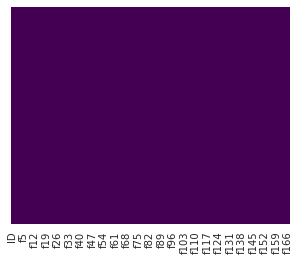

In [275]:
# Heatmap to show NaN value is present or not
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [276]:
# Number of unique values in dataset
df.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

In [277]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6598.0,3299.500000,1904.822870,1.0,1650.25,3299.5,4948.75,6598.0
f1,6598.0,58.945135,53.249007,-31.0,37.00,44.0,53.00,292.0
f2,6598.0,-119.128524,90.813375,-199.0,-193.00,-149.0,-95.00,95.0
f3,6598.0,-73.146560,67.956235,-167.0,-137.00,-99.0,-19.00,81.0
f4,6598.0,-0.628372,80.444617,-114.0,-70.00,-25.0,42.00,161.0
...,...,...,...,...,...,...,...,...
f163,6598.0,201.760230,59.526751,73.0,166.00,191.0,215.00,625.0
f164,6598.0,-47.488330,55.069365,-289.0,-68.00,-60.0,-45.00,295.0
f165,6598.0,-150.259927,76.019023,-428.0,-179.00,-150.0,-120.00,168.0
f166,6598.0,41.770233,94.116085,-471.0,-9.00,27.0,119.00,367.0


Dimentional reduction

Here we are going to drop the ID ,conformation_name and molecule_name feature from the data set because it wont effect the final result.By droping these feature we can reduce our computational time and also it help in data compression.

In [278]:
df.drop([ 'ID', 'conformation_name' , 'molecule_name'], axis=1, inplace=True)


In [279]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [280]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df[feature_columns] = sc.fit_transform(df[feature_columns])

In [281]:
#Splitting the data
feature_columns = df.columns.difference( ['class'] )
X_train, X_test, y_train, y_test  = train_test_split(df[feature_columns],
                                                  df['class'],
                                                  test_size=0.2,random_state=101)
                                                  

In [282]:
print(len( X_train ))
print(len (y_train))
print(len( X_test))
print(len( y_test))
print(df.shape)

5278
5278
1320
1320
(6598, 167)


In [283]:
# To ignore Convergence Warnings otherwise it is going to take up a lot of space
import warnings
warnings.filterwarnings("ignore")  

In [284]:

logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train )
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
  True False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False  True False
 False False False  True  True False False False False False False False
 False False False False False False  True False False False False False
 False False False False False  True  True False  T

In [285]:
# capturing the important variables
RFE_features=X_train.columns[rfe.get_support()]
RFE_features

Index(['f1', 'f124', 'f131', 'f138', 'f17', 'f3', 'f52', 'f67', 'f71', 'f72',
       'f85', 'f95', 'f96', 'f98', 'f99'],
      dtype='object')

In [286]:
X_new = SelectKBest(f_classif,k=80).fit(X_train, y_train )

In [287]:
# capturing the important variables
KBest_features=X_train.columns[X_new.get_support()]
KBest_features

Index(['f1', 'f103', 'f104', 'f105', 'f106', 'f108', 'f109', 'f11', 'f110',
       'f111', 'f112', 'f113', 'f114', 'f118', 'f119', 'f12', 'f124', 'f125',
       'f126', 'f13', 'f132', 'f134', 'f135', 'f136', 'f139', 'f14', 'f146',
       'f148', 'f149', 'f15', 'f157', 'f16', 'f163', 'f17', 'f18', 'f19', 'f2',
       'f20', 'f22', 'f23', 'f26', 'f29', 'f31', 'f36', 'f37', 'f44', 'f45',
       'f46', 'f48', 'f49', 'f52', 'f53', 'f54', 'f58', 'f59', 'f6', 'f61',
       'f66', 'f68', 'f69', 'f7', 'f70', 'f73', 'f74', 'f75', 'f77', 'f78',
       'f79', 'f8', 'f80', 'f81', 'f82', 'f86', 'f87', 'f9', 'f91', 'f92',
       'f95', 'f96', 'f97'],
      dtype='object')

In [288]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [289]:
clf_comp= Sequential([
  Dense(60, activation = 'relu', input_dim = 166),

  Dense(60, activation = 'relu'),
  Dense(1, activation = 'sigmoid')])

clf_comp.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [290]:
history = clf_comp.fit(X_train,y_train,batch_size=20,epochs=100,validation_data=(X_test,y_test))
score=clf_comp.evaluate(X_test,y_test,verbose=0)
print(score)

Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 0.7164 - accuracy: 0.5239 - val_loss: 0.7029 - val_accuracy: 0.5508
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5565 - val_loss: 0.6785 - val_accuracy: 0.5811
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.5906 - val_loss: 0.6556 - val_accuracy: 0.6098
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 0.6432 - accuracy: 0.6281 - val_loss: 0.6340 - val_accuracy: 0.6470
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.6527 - val_loss: 0.6138 - val_accuracy: 0.6667
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.6760 - val_loss: 0.5950 - val_accuracy: 0.6947
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 0.5829 - accuracy: 0.7008 - val_loss: 0.5773 - val_accuracy: 0.7220

Accuracy graph

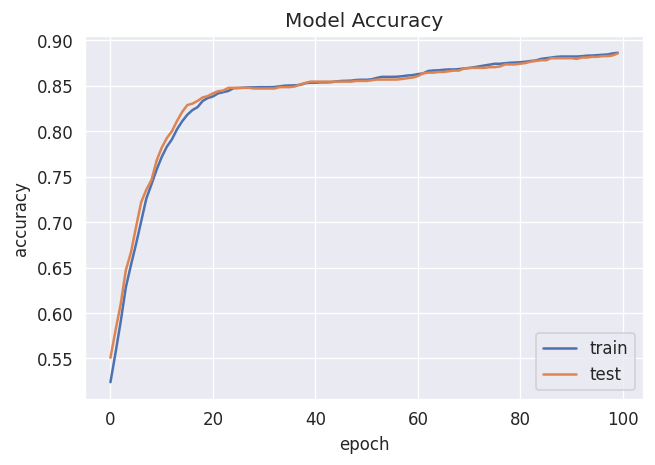

In [291]:
%matplotlib inline
plt.figure(dpi=120)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

Plotting Loss Graph

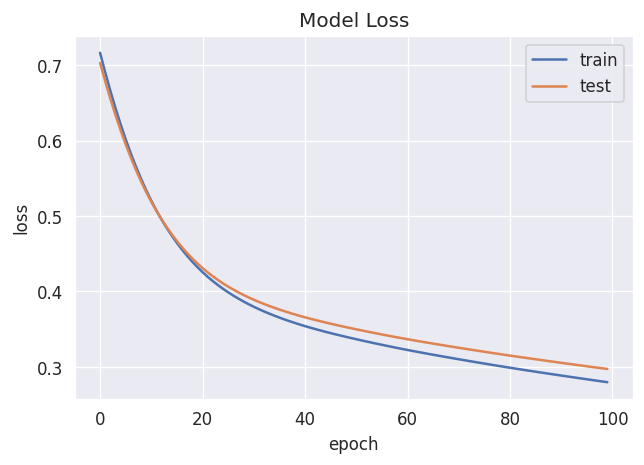

In [292]:
plt.figure(dpi=120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [293]:
KBest_features

Index(['f1', 'f103', 'f104', 'f105', 'f106', 'f108', 'f109', 'f11', 'f110',
       'f111', 'f112', 'f113', 'f114', 'f118', 'f119', 'f12', 'f124', 'f125',
       'f126', 'f13', 'f132', 'f134', 'f135', 'f136', 'f139', 'f14', 'f146',
       'f148', 'f149', 'f15', 'f157', 'f16', 'f163', 'f17', 'f18', 'f19', 'f2',
       'f20', 'f22', 'f23', 'f26', 'f29', 'f31', 'f36', 'f37', 'f44', 'f45',
       'f46', 'f48', 'f49', 'f52', 'f53', 'f54', 'f58', 'f59', 'f6', 'f61',
       'f66', 'f68', 'f69', 'f7', 'f70', 'f73', 'f74', 'f75', 'f77', 'f78',
       'f79', 'f8', 'f80', 'f81', 'f82', 'f86', 'f87', 'f9', 'f91', 'f92',
       'f95', 'f96', 'f97'],
      dtype='object')

In [294]:
RFE_features

Index(['f1', 'f124', 'f131', 'f138', 'f17', 'f3', 'f52', 'f67', 'f71', 'f72',
       'f85', 'f95', 'f96', 'f98', 'f99'],
      dtype='object')

In [295]:
features=set(list(RFE_features)+list(KBest_features)+['class'])
print(features)

{'f118', 'f67', 'f96', 'f70', 'f109', 'f23', 'f22', 'f45', 'f16', 'f58', 'f103', 'f29', 'f138', 'f98', 'f157', 'f14', 'f69', 'f79', 'f52', 'f46', 'f59', 'f105', 'f13', 'f92', 'f1', 'f131', 'f17', 'f78', 'f77', 'f85', 'f95', 'f125', 'class', 'f20', 'f48', 'f163', 'f124', 'f91', 'f119', 'f36', 'f68', 'f11', 'f99', 'f112', 'f136', 'f37', 'f134', 'f44', 'f53', 'f104', 'f74', 'f139', 'f149', 'f72', 'f7', 'f54', 'f87', 'f9', 'f66', 'f86', 'f31', 'f80', 'f18', 'f135', 'f71', 'f2', 'f110', 'f49', 'f12', 'f126', 'f148', 'f106', 'f111', 'f3', 'f82', 'f97', 'f113', 'f146', 'f75', 'f19', 'f73', 'f81', 'f61', 'f114', 'f6', 'f108', 'f8', 'f26', 'f132', 'f15'}


In [296]:
#data_new=df[features]

In [297]:
X_train_new = X_train.loc[:,KBest_features]
X_test_new = X_test.loc[:,KBest_features]
X_train_new.head()

,f1,f103,f104,f105,f106,f108,f109,f11,f110,f111,f112,f113,f114,f118,f119,f12,f124,f125,f126,f13,f132,f134,f135,f136,f139,f14,f146,f148,f149,f15,f157,f16,f163,f17,f18,f19,f2,f20,f22,f23,f26,f29,f31,f36,f37,f44,f45,f46,f48,f49,f52,f53,f54,f58,f59,f6,f61,f66,f68,f69,f7,f70,f73,f74,f75,f77,f78,f79,f8,f80,f81,f82,f86,f87,f9,f91,f92,f95,f96,f97
6545,-0.280686,0.405678,0.250572,0.251103,1.102995,-1.124826,0.812506,0.362308,0.316617,0.290167,-0.997428,-1.337528,-1.264744,-1.442197,-1.465751,-0.063755,0.714264,-1.176735,0.032903,-0.294416,-0.952998,-0.179484,0.628884,0.004208,-1.047120,0.434214,0.007114,-0.213763,-0.130161,0.459228,-0.298963,0.278743,-0.735191,-1.352777,0.451824,0.513381,0.177614,0.213153,-1.258248,-0.903334,-1.266715,-1.110914,-0.432384,0.422617,-0.567829,0.479052,0.150590,0.489713,-1.452722,0.652658,-1.266806,-1.260138,0.542938,-0.559409,-1.920424,-1.344622,-0.072400,-0.113111,-0.368977,0.430410,-1.351967,-0.486059,-0.037194,0.089918,0.668793,-1.280923,0.805022,0.247350,0.319350,-0.022910,-1.527342,-1.297750,-1.344183,-0.217246,-1.329385,-0.748498,-0.929542,-0.413633,0.893548,-1.237474
958,-0.318249,0.632347,0.580095,0.241251,-0.585194,0.344684,0.149751,0.665330,0.642846,0.342859,2.296699,1.924745,1.903506,0.744028,0.901113,0.740918,0.512881,-1.159058,0.137760,0.698429,-0.941137,0.202342,-0.012973,-0.093100,1.960915,0.029010,-0.344628,-0.007556,0.072929,0.275558,-0.298963,-0.443207,-0.214378,0.805398,0.191231,0.367922,0.056478,0.011384,0.900713,2.238940,0.805970,0.039055,-0.419919,-1.627645,-0.500955,0.273499,0.673030,0.549287,0.610724,-0.131935,1.079501,1.598901,0.671010,-0.258072,-0.688739,-1.307396,0.072153,-1.133780,-0.352248,-0.049961,0.677399,-0.164594,0.795323,0.549807,0.427344,0.800438,-0.030589,0.717504,0.020564,0.648153,1.795040,0.739144,0.752073,0.136563,0.950928,-0.784526,-1.209754,-0.436680,-1.172768,-0.311835
4258,-0.036532,-1.624040,-1.580113,-1.650330,-0.751791,1.085224,-1.705964,-1.125252,-1.768917,-1.669986,0.017027,0.322736,0.319381,0.590450,0.203511,-1.610237,0.023809,-1.176735,-0.784978,-0.099102,1.810613,-1.075306,-1.273765,0.117735,0.683819,-1.572043,-0.305546,-0.261349,-0.888363,-1.652979,-0.322856,-0.499831,0.776849,-0.022045,-0.134510,-1.680632,-0.868566,-1.754098,0.400226,0.196991,0.904669,0.275350,-0.419919,3.454202,-0.567829,-1.487105,-1.716856,-0.910277,0.974862,-1.419157,0.393955,0.524363,-0.823165,-0.735190,0.153992,-0.066509,-0.784842,2.161011,0.551107,-1.080758,0.347844,0.326063,-0.707533,-1.634666,-1.781921,0.435578,-1.202364,-1.717654,-1.041786,-1.616684,0.602390,0.422914,0.508524,-1.113562,0.590878,-0.811547,-1.327738,-0.920662,1.825589,-1.167045
74,-0.186781,-1.737375,-1.662494,-1.640478,-0.862856,1.085224,-1.685572,-1.363996,-1.757266,-1.648909,0.028425,0.332445,0.329099,0.590450,0.203511,-1.585091,0.369036,-1.150219,-0.113896,-0.685043,0.067047,-1.045935,-1.250841,0.101517,0.683819,-1.552277,-0.266463,-0.293073,-0.915442,-1.632572,-0.310910,-0.499831,-0.567187,-0.039105,-0.118223,-1.680632,-0.879579,-2.283742,0.410040,0.207571,0.914539,0.212338,-0.419919,-0.681370,-0.567829,-1.576476,-1.694625,-1.257792,0.987000,-1.419157,0.403610,0.533957,-1.111327,-0.735190,0.218818,0.678023,0.154755,-0.345895,0.534378,2.061671,0.356516,0.309144,-1.540051,-1.611672,-1.926791,0.427286,-1.308016,-1.693543,-1.141381,-1.691247,0.613039,0.432215,0.508524,-1.125355,0.600110,-0.811547,-1.165510,0.070349,0.999062,0.452824
30,-0.506060,-1.397371,-1.708261,-1.689738,-1.407075,0.876947,-1.257330,-1.850667,-1.757266,-1.648909,-0.005770,0.468373,0.319381,0.915674,0.618751,-1.811405,-1.572867,-1.159058,-1.498002,-0.717596,-1.202078,-1.530561,-1.652002,0.198825,0.314412,-1.700522,-0.286004,0.151065,-0.089543,-1.612164,-0.346750,-0.528143,-0.768792,0.191214,-0.737131,-2.153375,0.298751,0.023994,0.341346,-0.099250,0.865189,-1.189679,-0.419919,-1.627645,-0.462741,-1.737343,-1.761319,-1.605307,0.889896,-2.117934,0.548444,0.447610,-1.506216,-0.471519,-0.494263,0.392619,-0.805492,-0.739837,0.634751,-0.100000,0.45

In [298]:
clf1_comp= Sequential([
  Dense(40, activation = 'relu', input_dim = 80),

  Dense(40, activation = 'relu'),
  Dense(1, activation = 'sigmoid')])

clf1_comp.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [299]:
history = clf1_comp.fit(X_train_new,y_train,batch_size=20,epochs=100,validation_data=(X_test_new,y_test))
score=clf1_comp.evaluate(X_test_new,y_test,verbose=0)
print(score)

Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 0.6000 - accuracy: 0.6275 - val_loss: 0.5800 - val_accuracy: 0.6439
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.6408 - val_loss: 0.5676 - val_accuracy: 0.6614
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.6597 - val_loss: 0.5555 - val_accuracy: 0.6773
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.6802 - val_loss: 0.5438 - val_accuracy: 0.6932
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7005 - val_loss: 0.5325 - val_accuracy: 0.7091
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7192 - val_loss: 0.5216 - val_accuracy: 0.7273
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.7382 - val_loss: 0.5111 - val_accuracy: 0.7500

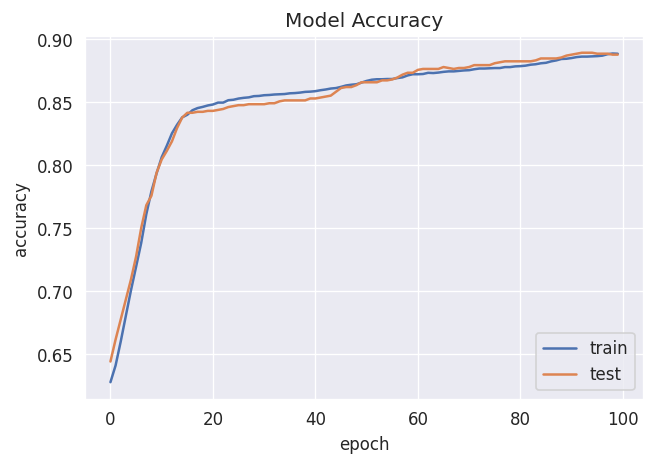

In [300]:
%matplotlib inline
plt.figure(dpi=120)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

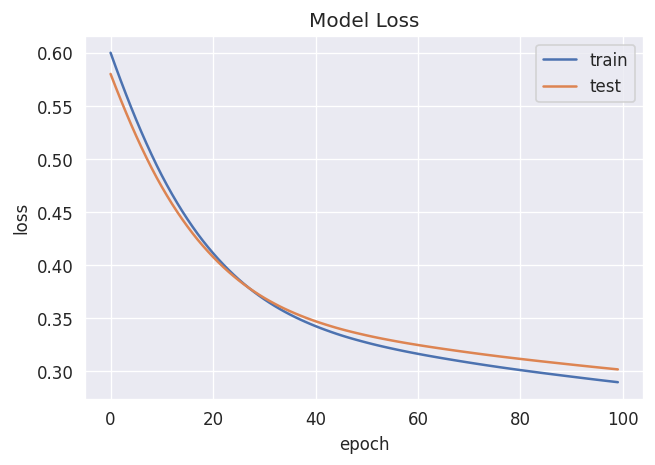

In [301]:
plt.figure(dpi=120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [302]:
train = confusion_matrix(y_train, clf_comp.predict_classes(X_train))
print(train)

[[4454   12]
 [ 586  226]]


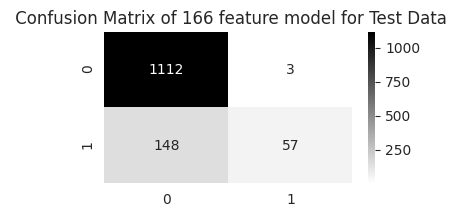

In [303]:
%matplotlib inline 
sns.set({'figure.figsize': (4,2)},font_scale=2)
plt.figure(dpi=100)
sns.heatmap(confusion_matrix(y_test, clf_comp.predict_classes(X_test)), cmap='binary', annot=True, fmt='.0f')
plt.title(' Confusion Matrix of 166 feature model for Test Data')
plt.show()

In [304]:
test = confusion_matrix(y_test, clf1_comp.predict_classes(X_test_new))
print(test)


[[1110    5]
 [ 143   62]]


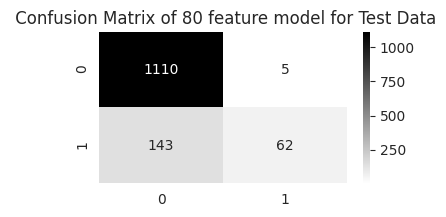

In [305]:
%matplotlib inline 
sns.set({'figure.figsize': (4,2)},font_scale=2)
plt.figure(dpi=100)
sns.heatmap(test, cmap='binary', annot=True, fmt='.0f')
plt.title(' Confusion Matrix of 80 feature model for Test Data')
plt.show()


In [306]:
class_report_train=pd.DataFrame(classification_report(y_train, clf_comp.predict_classes(X_train), output_dict=True)).T

class_report_train

,precision,recall,f1-score,support
0,0.883730,0.997313,0.937092,4466.0000
1,0.949580,0.278325,0.430476,812.0000
accuracy,0.886700,0.886700,0.886700,0.8867
macro avg,0.916655,0.637819,0.683784,5278.0000
weighted avg,0.893861,0.886700,0.859151,5278.0000


In [307]:
class_report_train=pd.DataFrame(classification_report(y_train, clf1_comp.predict_classes(X_train_new), output_dict=True)).T

class_report_train

,precision,recall,f1-score,support
0,0.885663,0.997313,0.938178,4466.000000
1,0.951807,0.291872,0.446748,812.000000
accuracy,0.888784,0.888784,0.888784,0.888784
macro avg,0.918735,0.644592,0.692463,5278.000000
weighted avg,0.895839,0.888784,0.862573,5278.000000
